## EDA
데이터분석 가장 첫 번째 단계로, 데이터 특징과 데이터에 내재된 관계를 알아내기 위해 그래프와 통계적 분석 방법을 활용하여 데이터를 탐구하는 것으로 자료 유형과 범위, 수준을 파악하거나 데이터 분포 확인 및 전처리, 알고리즘 선정 시 참고 자료로 사용된다
- 저항성 강조 : 이상치 등 부분적 변동에 대한 민감성 확인
- 잔차 계산 : 관찰 값들이 주 경향에서 벗어난 정도 파악
- 자료변수의 재표현 : 변수를 적당한 척도로 바꾸는 것
- 그래프를 통한 현시성 : 분석결과를 이해하기 쉽게 시각화하는 것

#### [그래프를 통한 현시성]
##### 1) 막대그래프
범주형 데이터 요약 및 시각적 비교에 효과적인 그래프로, 각 범주 값의 개수 차이를 비교하여 극단적인지를 확인할 수 있다. 

<b><팁></b> 만약 범주의 개수 차이가 극단적일 경우 데이터 전처리 과정에서 업/다운 샘플링 등을 통해 각 범주의 개수가 유사하도록 조정해야 한다는 인사이트를 얻을 수 있다.

<b><해석></b> 해당 그래프에서는 범주 개수 차이가 7:5 정도이므로 극단적인 차이를 보이지는 않는다.

In [3]:
# 데이터 가져오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

# 도수분포표
# data_count = data['target'].value_counts()
wine_type = wine['Class'].value_counts()
wine_type

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

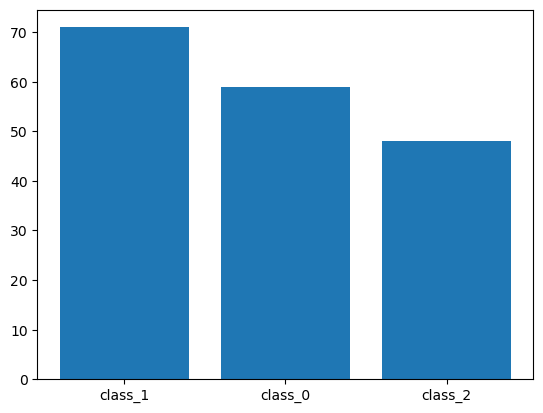

In [4]:
# 막대그래프 그리기
# plt.bar(x, y, width=0.8, bottom=None, align='center')
plt.bar(wine_type.index, wine_type.values, width=0.8, bottom=None, align='center')
plt.show()

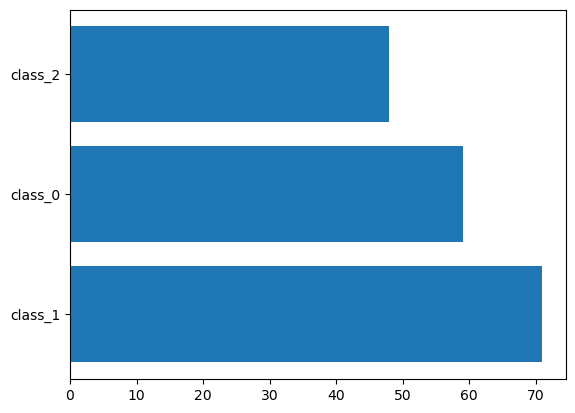

In [7]:
# plt.barh(x, y, height=0.8, left=None, align='center')
plt.barh(wine_type.index, wine_type.values, height=0.8, left=None, align='center')
plt.show()

##### 2) 히스토그램
연속형 자료에 대한 도수분포표를 시각화하여 나타낸 것으로 서로 겹치지 않는 특정 구간에 따른 데이터 빈도수를 표현한다.

<b><해석></b> alcohol 컬럼을 11~15의 범위를 0.5씩 8개 구간으로 나누어 표기한 히드토그램이다. 그래프를 보면 가장 많은 데이터가 차지하고 있는 알코올 구간은 12~12.5도 사이이며, 그 다음은 13~14도 구간이다. 하나의 봉우리를 가진 정규분포의 모양을 하고 있기보다는 알코올 도수는 12~14도 구간에 밀집되어 있는 것으로 해석할 수 있다.

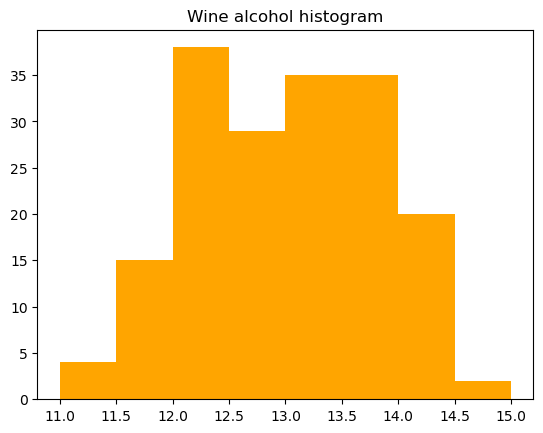

In [14]:
# plt.hist('변수명', bins=8, range=(11,15), density=False, data=wine)
# bins : 구간 개수, range : bin의 상한값과 하한값, density : True이면 확률밀도함수를 그려서 반환
plt.title('Wine alcohol histogram')
plt.hist('alcohol', bins=8, range=(11,15), color='orange', data=wine)
plt.show()

##### 3) 상자그림(Box Plot)
<img src="https://coding-x-service-file.s3.ap-northeast-2.amazonaws.com/1634692814533.png" width='25%' height='25%'>

사분위수를 이용하여 수치형 변수의 값의 분포를 확인하는 그래프로 상자 크기, 중앙값 위치, 값의 분포와 대칭정도, 이상치까지 다양한 정보를 한눈에 확인할 수 있다. IQR은 중앙 50% 데이터들이 퍼진 정도를 보여주며 이상치를 정제하기 위한 판단 기준으로 사용한다.

<b><팁></b> class 같은 문자열 변수는 표현할 수 없기 때문에 제외해야 한다.

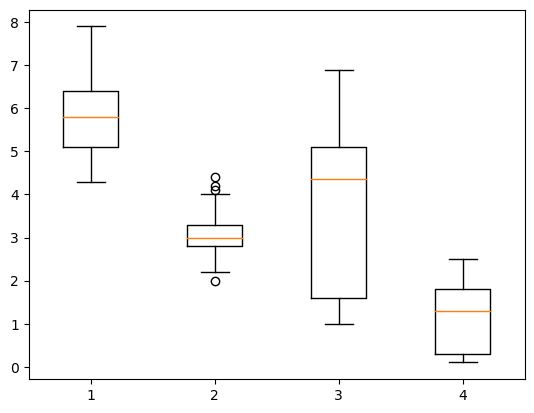

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')


In [30]:
# 데이터 가져오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# boxplot
plt.boxplot(iris.drop(columns='class'))
plt.show()
print(iris.columns)

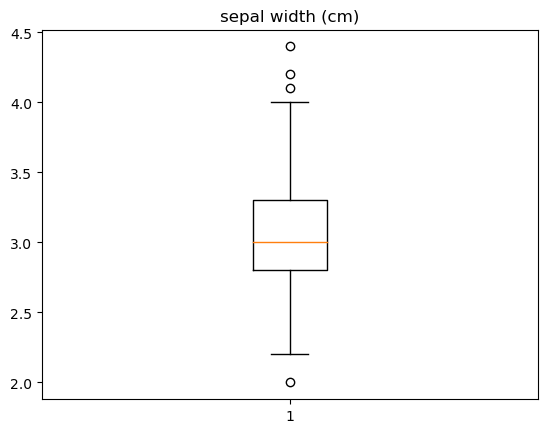

In [31]:
# 하나의 컬럼만 그리기
# whis : IQR에 곱하는 인수(default 1.5)
plt.boxplot(iris['sepal width (cm)'], whis=1.5)
plt.title('sepal width (cm)')
plt.show()

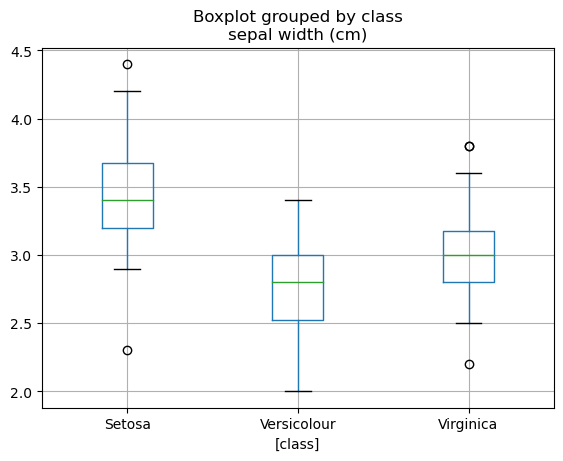

In [32]:
# 한 컬럼을 타겟(class)별로 분리하여 표현
iris[['sepal width (cm)', 'class']].boxplot(by='class')
plt.show()

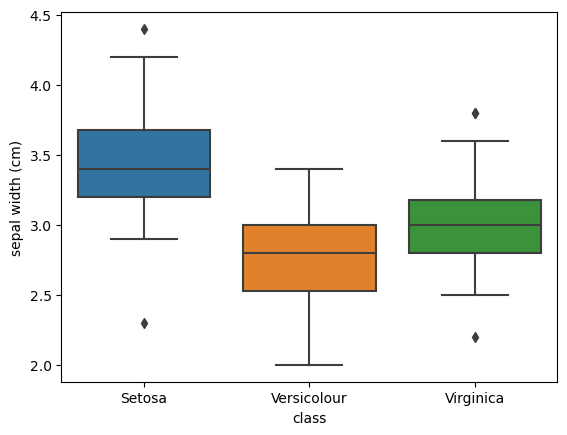

In [33]:
import seaborn as sns
sns.boxplot(x='class', y='sepal width (cm)', data=iris)
plt.show()

##### 4) 산점도(Scatter Plot)
<img src="http://www.ssacstat.com/base/component/board/board_12/u_image/370/20160319074949_1104132722.jpg" width='45%' height='45%'>

두 개의 수치형 변수의 분포와 관계를 확인하는 기본 그래프이다.

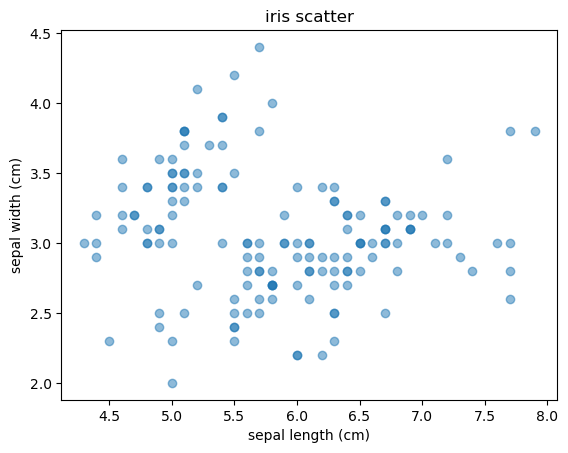

In [34]:
# 데이터 가져오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 산점도
plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(x=iris['sepal length (cm)'], y=iris['sepal width (cm)'], alpha=0.5)
plt.show()

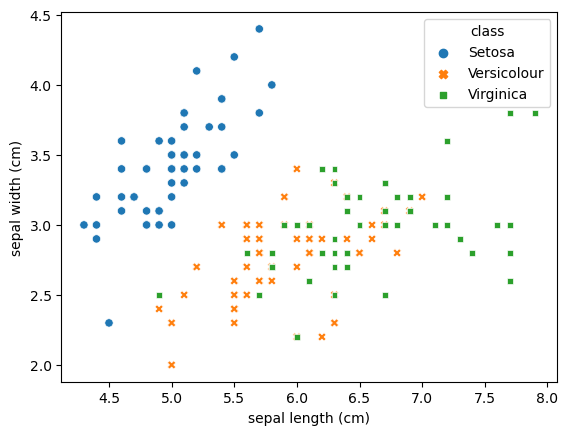

In [35]:
# 한 컬럼을 타겟별로 분리하여 표현
import seaborn as sns
sns.scatterplot(x=iris['sepal length (cm)'], y=iris['sepal width (cm)'], data=iris, hue='class', style='class')
plt.show()

##### 5) 선 그래프 (수평, 수직, 함수, 회귀)

- 수평/수직선 : 그래프에 한계점, 평균값 등 강조 표시를 위해 많이 사용한다.

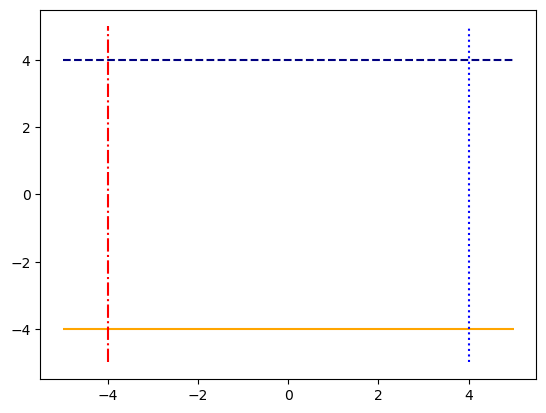

In [45]:
# 수평 : plt.hlines(y, xmin, xmax, colors='orange', linestyles='solid')
# 수직 : plt.vlines(x, ymin, ymax, colors='orange', linestyles='solid')
plt.hlines(-4, -5, 5, colors='orange', linestyles='solid')
plt.hlines(4, -5, 5, colors='navy', linestyles='dashed')

plt.vlines(-4, -5, 5, colors='red', linestyles='dashdot')
plt.vlines(4, -5, 5, colors='blue', linestyles='dotted')

- 함수식

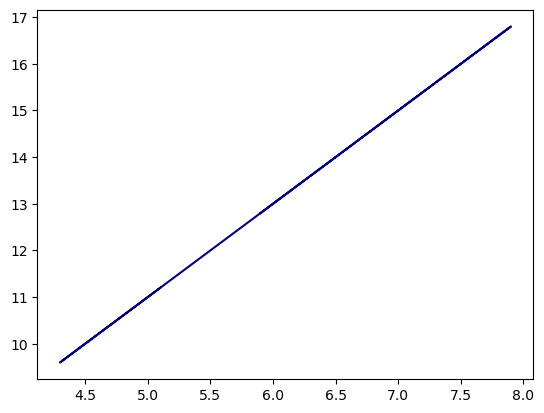

In [46]:
# 데이터 가져오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})


# plt.plot(x축, 함수식, data=df, c='color')
def linear_func(x) :
  return 2*x + 1

X = iris['sepal length (cm)']
plt.plot(X, linear_func(X), c='navy')
plt.show()

- 회귀선 : np.polyfit() 함수는 X값, Y값, 차수를 입력받아 최소제곱 다항식에 적합한다. 함수 결과값은 차수+1개가 출력되며 가장 높은 차원 계수부터 순서대로 출력된다.

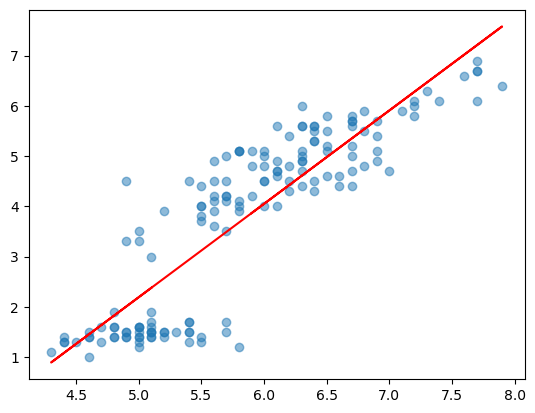

In [48]:
# 산점도 + 회귀선
# np.polyfit(X, Y, degree)
import numpy as np

X, Y = iris['sepal length (cm)'], iris['petal length (cm)']
b1, b0 = np.polyfit(X, Y, 1)

plt.scatter(x=X, y=Y, alpha=0.5)
plt.plot(X, b1*X + b0, color='red')
plt.show()

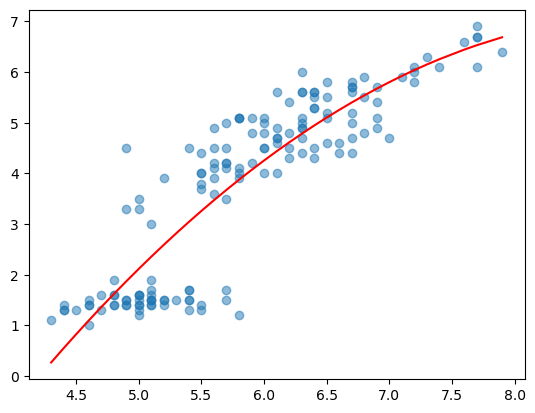

In [52]:
# 2차 이상 그래프
iris2 = iris.sort_values(by='sepal length (cm)')
X, Y = iris2['sepal length (cm)'], iris2['petal length (cm)']
b2, b1, b0 = np.polyfit(X, Y, 2)
plt.scatter(x=X, y=Y, alpha=0.5)
plt.plot(X, b2*(X**2) + b1*X + b0, color='red')
plt.show()

- 꺾은선 : 시간 변화에 따라 값이 지속적으로 변화할 때 유용한 그래프

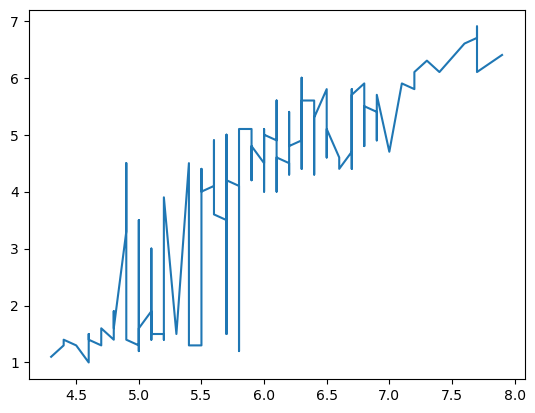

In [53]:
iris2 = iris.sort_values(by='sepal length (cm)')
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2)
plt.show()

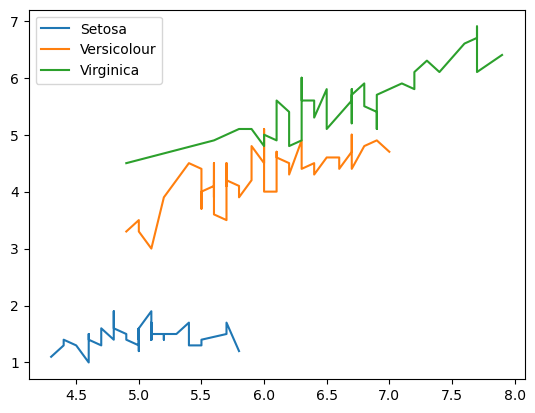

In [58]:
# 타겟별로 분리하여 보기
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['class']=='Setosa'])
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['class']=='Versicolour'])
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['class']=='Virginica'])
plt.legend(iris2['class'].unique())
plt.show()

##### 6) 상관관계 시각화

- 산점도 행렬 : 두 개 이상 변수들 간 산점도를 그린 그래프로 데이터 분포를 한눈에 파악할 수 있고, 2차원 이상 관계가 존재하는지 여부도 파악할 수 있다.

    <b><해석방법></b>
  - 히스토그램을 통해 이상치 확인
  - 종속변수가 수치형인 경우 각 설명변수와의 직선 상관관계 비교
  - 종속변수가 범주형인 경우 종속변수를 잘 구분하는 변수 파악
  - 설명변수 간 직선 함수관계를 파악하여 다중공선성 문제 진단

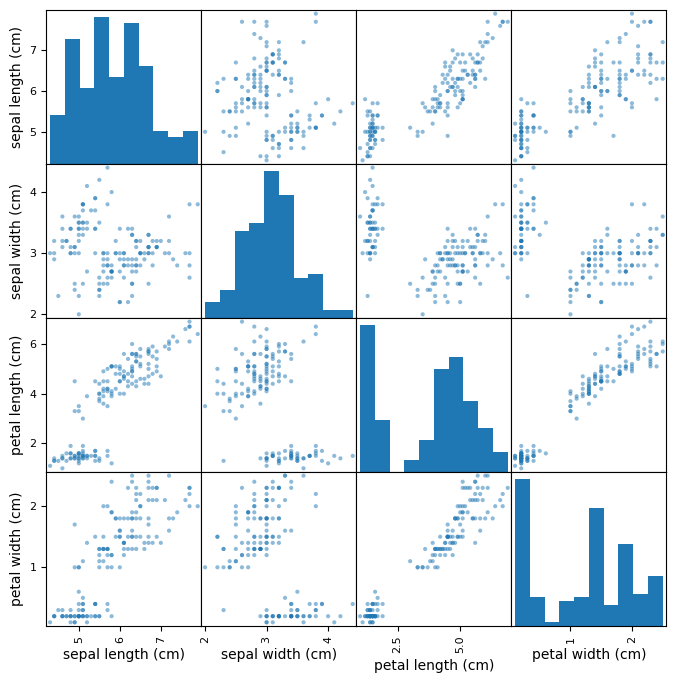

In [62]:
from pandas.plotting import scatter_matrix

# scatter_matrix(data, alpha = 0.5, figsize=(8,8), diagonal='hist/kde')
scatter_matrix(iris, alpha = 0.5, figsize=(8,8), diagonal='hist')
plt.show()

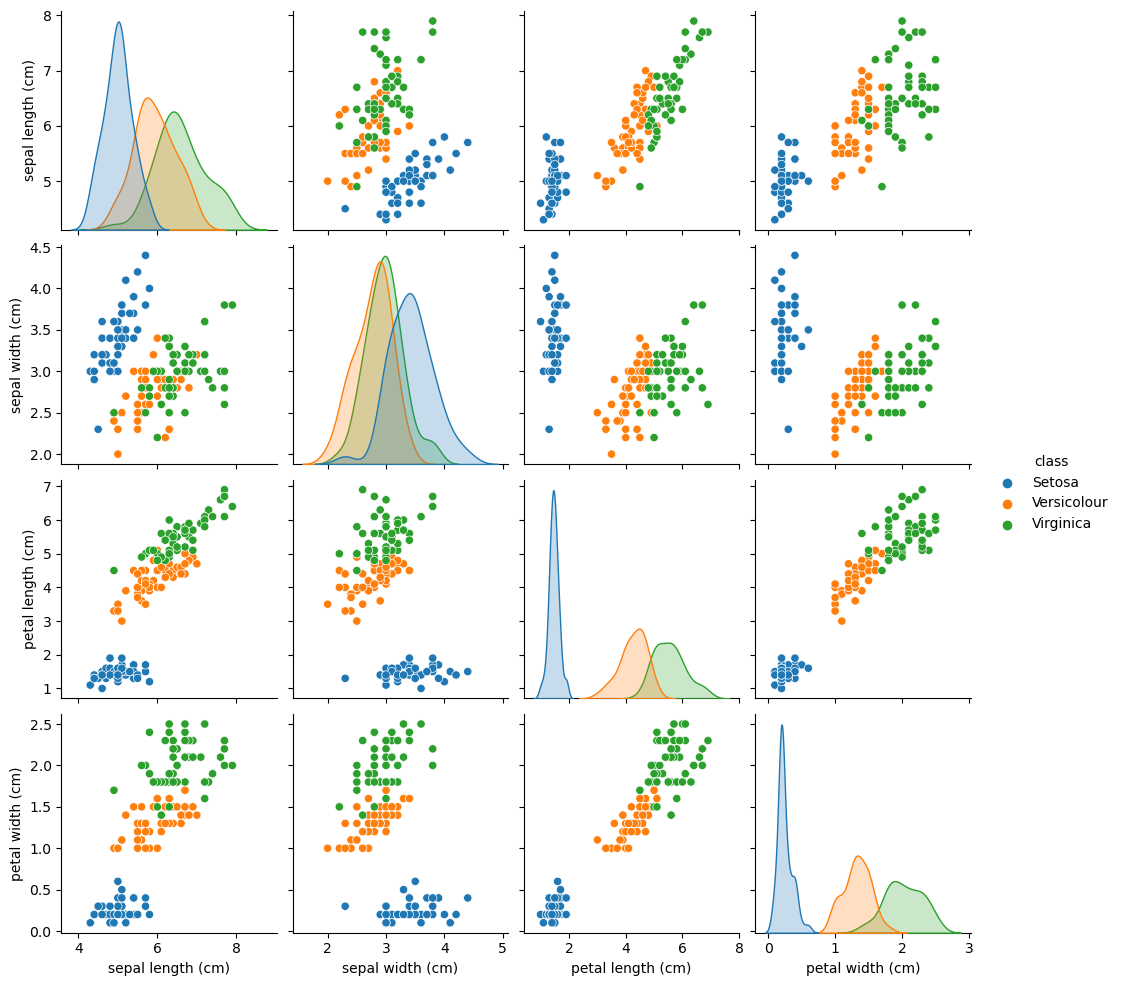

In [66]:
# sns.pairplot(data, diag_kind='auto/hist/kde', hue='target column')
sns.pairplot(iris, diag_kind='auto', hue='class')
plt.show()

- 상관계수 행렬 : 다수의 변수 간 상관관계를  파악하거나 독립변수 간 다중공선성 파악하고자 할 때 사용하는 기법

<b><해석></b> petal length와 petal width는 0.96으로 매우 강한 양의 상관관계를 가진다. sepal length와 petal length, sepal length와 petal width 또한 상관관계가 각각 0.87, 0.82로 높은 양의 상관관계를 가진다. 하지만 sepal length와 sepal width는 거의 상관이 없다.

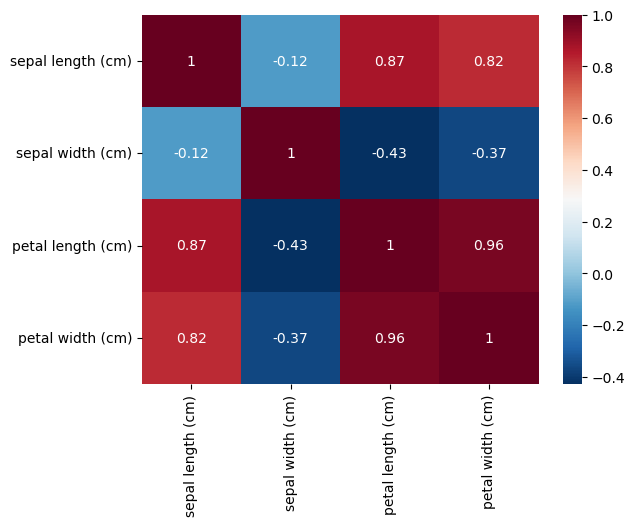

In [69]:
# data = data.corr(method='pearson/kendall,spearman')
iris_corr = iris.drop(columns='class').corr(method='pearson')
sns.heatmap(iris_corr, xticklabels=iris_corr.columns, yticklabels=iris_corr.columns, cmap='RdBu_r', annot=True)
plt.show()